In [1]:
import tensorflow as tf
import numpy as np

### Working with Multiple layers

In [6]:
# first create the image
batch_size = [1]
img_size   = [4,4,1]
data       = tf.random.uniform(shape = batch_size + img_size)

In [16]:
# creating the moving layers
def moving_layer(x):
#     myFilter = tf.constant(0.25, shape = (2,2,1,1))
    myFilter = tf.constant([[[[0.25]],[[0.25]]],[[[0.25]],[[0.25]]]])
    myStrides= [1,2,2,1]
    z = tf.nn.conv2d(x, myFilter, myStrides, padding = 'SAME', name = 'moving_layer')
    return z

In [17]:
# creating the second neuron layer i.e. weighted summation + activation
def second_layer(x):
    '''The input is 4 dimensional and should be squeezed to 2 dimensions'''
    x = tf.squeeze(x)
    A = tf.constant([[1,2],[-1, 4]], dtype = tf.float32)
    b = tf.constant(1., shape = (2,2))
    z = tf.add(tf.matmul(A,x), b)
    return tf.nn.sigmoid(z)

In [18]:
first_layer_tensor = moving_layer(data)
second_layer_tensor= second_layer(first_layer_tensor)
print(second_layer_tensor.numpy())

[[0.93297553 0.9044909 ]
 [0.9147111  0.937245  ]]


### Backpropagation

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
np.random.seed(0)
xvals = np.random.normal(1, 0.1, 100).astype(np.float32)
yvals = (xvals * np.random.normal(1, 0.05, 100)-0.5).astype('float32')

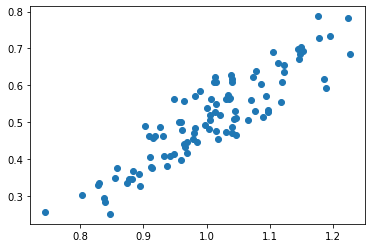

In [37]:
plt.scatter(xvals, yvals)
plt.show()

In [56]:
def my_output(x, weights, biases):
    return tf.add(tf.multiply(x, weights), biases)

In [57]:
def L2_loss_func(ytrue, ypred):
    return tf.reduce_mean(tf.square(ypred - ytrue))

In [62]:
my_opt = tf.optimizers.SGD(learning_rate = 0.02)

In [63]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape = [1]))
biases  = tf.Variable(tf.random.normal(shape = [1]))
history = []

In [66]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [xvals[rand_index]]
    rand_y = [yvals[rand_index]]
    
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = L2_loss_func(rand_y, predictions)
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if(i+1)%25 == 0:
        print(f'Step:{i+1} Weights:{weights.numpy()} Biases:{biases.numpy()}')
        print(f'Loss : {loss.numpy()}')
    

Step:25 Weights:[-0.43744692] Biases:[0.980521]
Loss : 0.00911057461053133
Step:50 Weights:[-0.41757247] Biases:[0.98669845]
Loss : 0.0066385092213749886
Step:75 Weights:[-0.42524943] Biases:[0.95881224]
Loss : 0.10905004292726517
Step:100 Weights:[-0.4293466] Biases:[0.9367944]
Loss : 0.034686408936977386


In [67]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2
    gradients_dydx = tape.gradient(y, x)

In [68]:
print(gradients_dydx.numpy())

6.0


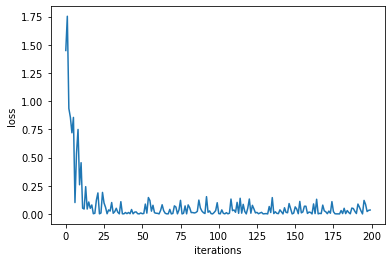

In [70]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [77]:
a = np.concatenate((np.random.normal(3,1,50),np.random.normal(-3,1,50)))

In [87]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,0])
c = np.concatenate(tuple((a,b)))

In [88]:
c

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [89]:
print(a,b)

[1 2 3 4 5] [6 7 8 9 0]


In [90]:
# practicing concatenation
a = np.array([[1,2],[3,4]])
b = np.array([5,6])

In [93]:
print(np.concatenate((a, np.reshape(b, (2,1))), axis  = 1))

[[1 2 5]
 [3 4 6]]


In [96]:
print(np.concatenate((a, np.reshape(b, (1,2))), axis = 0))

[[1 2]
 [3 4]
 [5 6]]


In [99]:
# Simple Linear regression example
import numpy 
import tensorflow as tf
import matplotlib.pyplot as plt

In [103]:
def my_output(x, weights, biases):
    return tf.add(tf.multiply(x, weights), biases)

In [105]:
def L2_loss(ytrue, ypred):
    return tf.reduce_mean(tf.square(ytrue - ypred))

In [142]:
my_opt = tf.optimizers.SGD(learning_rate = 0.02)

In [126]:
# sampling the weights and biases
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape = [1]))
biases  = tf.Variable(tf.random.normal(shape = [1]))

In [128]:
# Sample data from a random normal distribution
np.random.seed(0)
x = np.random.normal(1, 0.1, 100).astype('float32')
y = (x * np.random.normal(1,0.05,100)-0.5).astype('float32')

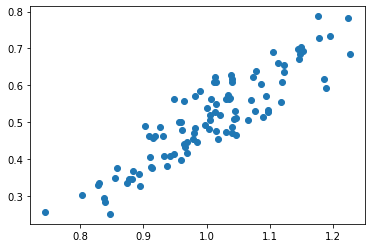

In [129]:
plt.scatter(x, y)
plt.show()

In [130]:
# Sample random weights and biases
np.random.seed(0)
tf.random.set_seed(1)

weights = tf.Variable(tf.random.normal(shape = [1]))
biases  = tf.Variable(tf.random.normal(shape = [1]))
history = []

In [145]:
# iterate for 100 iterations
for i in range(100):
    # randomly sample positionally x and y
    ind = np.random.choice(len(x))
    x_= x[ind]
    y_= y[ind]
    # start recording the feedforward opertions with tf.GradientTape
    with tf.GradientTape() as tape:
    # Step 1 : Perform the feed forward operations
        ypred = my_output(x_, weights, biases)
        loss  = L2_loss(y_, ypred)
    history.append(loss.numpy())
    # Step 2 : Calculate the gradients
    gradients = tape.gradient(loss, [weights, biases])
    # Step 3 : Apply the gradients on the target variables
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if(i+1)%25 == 0:
        print(f'Step : {(i+1)}, weights : {weights.numpy()}, biases : {biases.numpy()}')
        print(f'loss : {loss.numpy()}')

Step : 25, weights : [-0.3565607], biases : [0.88825095]
loss : 0.010149523615837097
Step : 50, weights : [-0.3603389], biases : [0.8632196]
loss : 0.04632649943232536
Step : 75, weights : [-0.33896312], biases : [0.8546998]
loss : 0.1342022716999054
Step : 100, weights : [-0.2849211], biases : [0.88979495]
loss : 0.07252684980630875


Text(0, 0.5, 'Loss')

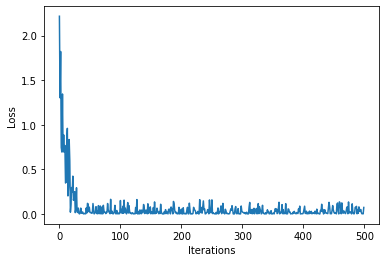

In [157]:
plt.plot(history)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [158]:
# Solving a simple classification problem
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
# Sample random values of x so they belong to two classes 
# centred around -3 and 3
x = np.concatenate((np.random.normal(-3, 1, 50), np.random.normal(3, 1, 50))).astype(np.float32)

# make an equivalent set of y's that only take two values based on which
# class it belongs to, 0 --> -3 and 1-->3
y = np.concatenate((np.repeat(0., 50), np.repeat(1., 50))).astype(np.float32)

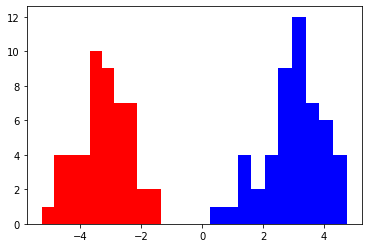

In [168]:
plt.hist(x[y == 1], color = 'b')
plt.hist(x[y == 0], color = 'r')
plt.show()

In [172]:
# updating the loss function
def loss_func(ytrue, ypred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=ytrue, logits = ypred))

In [173]:
# initialize the weights and the biases
tf.random.set_seed(1)
np.random.seed(0)

weights = tf.Variable(tf.random.normal(shape = [1]))
biases  = tf.Variable(tf.random.normal(shape = [1]))
history = []

In [176]:
for i in range(100):
    idx = np.random.choice(100)
    x_ = [x[idx]]
    y_ = [y[idx]]
    with tf.GradientTape() as tape:
    # Step 1 : perform the feedforward operations
        ypred = my_output(x_, weights, biases)
        loss  = loss_func(y_, ypred)
    history.append(loss)
    # Step 2 : Calculate the loss
    gradients = tape.gradient(loss, [weights ,biases])
    # Step 3 : Apply the gradient
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i+1)%25 == 0:
        print(f'step : {i+1}, weights : {weights.numpy()}, biases : {biases.numpy()}')
        print(f'loss : {loss.numpy()}')
        

step : 25, weights : [0.13385345], biases : [0.45627844]
loss : 0.7780274152755737
step : 50, weights : [0.52655023], biases : [0.41042128]
loss : 0.08553395420312881
step : 75, weights : [0.7320191], biases : [0.35961443]
loss : 0.10598313808441162
step : 100, weights : [0.8541594], biases : [0.3555894]
loss : 0.17221052944660187


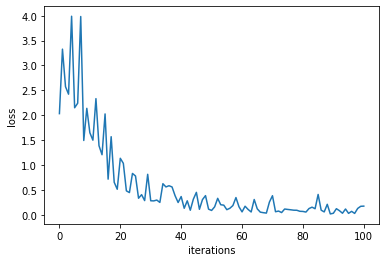

In [177]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [178]:
opt2 = tf.optimizers.SGD(learning_rate = 0.01)

## Batch and Stochastic Training

In [179]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [187]:
batch_size = 20
np.random.seed(0)
x = np.random.normal(1,0.1, 100).astype(np.float32)
y = (x * np.random.normal(1, 0.05, 100) - 0.5).astype(np.float32)

def loss_func(ytrue, ypred):
    return tf.reduce_mean(tf.square(ytrue - ypred))

def my_output(x, weights, biases):
    return tf.add(tf.multiply(x, weights), biases)

opt = tf.optimizers.SGD(learning_rate = 0.02)

np.random.seed(0)
tf.random.set_seed(1)

weights = tf.Variable(tf.random.normal(shape = [1]))
biases  = tf.Variable(tf.random.normal(shape = [1]))

history = []
for i in range(100):
    idx = np.random.choice(len(x), size = batch_size)
    x_ = [x[idx]]
    y_ = [y[idx]]
    #Step 1 : Monitor the feed forward operations
    with tf.GradientTape() as tape:
        ypred = my_output(x_, weights, biases)
        loss  = loss_func(y_, ypred)
    history.append(loss)
    #Step 2 : find the gradients
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i+1)%25 == 0:
        print(f'Step:  {(i+1)}, weights : {weights.numpy()}, biases : {biases.numpy()}')
        print(f'Loss : {loss.numpy()}')

Step:  25, weights : [-0.5499922], biases : [0.9312352]
Loss : 0.08445028215646744
Step:  50, weights : [-0.47954342], biases : [0.9839728]
Loss : 0.031912535429000854
Step:  75, weights : [-0.46342766], biases : [0.98506767]
Loss : 0.034592218697071075
Step:  100, weights : [-0.44716042], biases : [0.9861024]
Loss : 0.02924300730228424


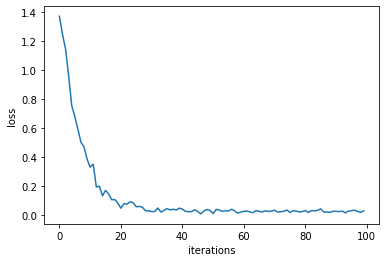

In [189]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()